<a href="https://colab.research.google.com/github/taichihaya/event/blob/master/%E3%82%A4%E3%83%99%E3%83%B3%E3%83%88%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%97%E3%83%88%EF%BC%88%E5%89%8D%E5%87%A6%E7%90%86%E7%9C%81%E7%95%A5%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **データ取り込み～前処理**
セルにカーソルを合わせて「Shift+Enter」を押してください

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/taichihaya/event/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [0]:
###### 日本語フォントを使用できるようにする ######
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v310.json

###### ライブラリのインストール ######
!pip install dtreeviz
import pandas as pd
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz
import warnings
warnings.filterwarnings("ignore")

###### データのインポート ######
# TODO データを持ってくる方法がよくわかっていない。どこかのサーバーに入れておく？（早川）
data_raw = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

###### 文字データを数値データに変換 ######
def mapping(x):
  if x=="No" or x=="Month-to-month" or x=="Electronic check" : return 0 
  elif x=="Yes" or x=="Male" or x=="DSL" or x=="One year" or x=="Mailed check": return 1
  elif x=="No internet service" or x=="No phone service" or x=="Female" or x=="Fiber optic" or x=="Two year" or x=="Bank transfer (automatic)": return 2
  elif x=="Credit card (automatic)": return 3
  else : return x

data = data_raw.applymap(mapping)

###### 欠損処理 ######
# TotalChargesは欠損値があり、文字列で取り込まれるため数値に変換、欠損値は0で埋める
data['TotalCharges'] = pd.to_numeric(data_raw.TotalCharges, errors='coerce').fillna(0.0)

###### カラムの日本語化 ######
col_jp = {"customerID":"ID","gender":"性別","SeniorCitizen":"年齢区分",
        "Partner":"婚姻有無","Dependents":"扶養家族","tenure":"利用月数",
        "PhoneService":"電話ｻｰﾋﾞｽ","MultipleLines":"回線数","InternetService":"ｲﾝﾀｰﾈｯﾄｻｰﾋﾞｽ",
        "OnlineSecurity":"ｾｷｭﾘﾃｨｻｰﾋﾞｽ","OnlineBackup":"ﾊﾞｯｸｱｯﾌﾟｻｰﾋﾞｽ","DeviceProtection":"機器予防ｻｰﾋﾞｽ",
        "TechSupport":"ﾃｸﾆｶﾙｻﾎﾟｰﾄ","StreamingTV":"ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(TV)","StreamingMovies":"ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(映画)",
        "Contract":"契約形態","PaperlessBilling":"請求書","PaymentMethod":"支払方法",
        "MonthlyCharges":"月額支払額","TotalCharges":"通算支払額","Churn":"解約"}

data = data.rename(columns=col_jp)

###### コンペ用に1,000件データの確保 ######
# イベント当日はコメントしない）
modeling_data,conpetition_data = train_test_split(data,test_size=1000 /len(data),random_state=11)

###### モデルの作成、結果の可視化 ######
def display_result():
  # 選択した変数のデータフレームの作成
  selected_data = modeling_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  # 訓練用、テスト用に分割
  X_train, X_test, y_train, y_test = train_test_split(selected_data,modeling_data['解約'], random_state=11)
  # 学習
  clf = DecisionTreeClassifier(max_depth=parameter.value)
  clf.fit(X_train, y_train)

  print('訓練データの正解率：{:.2%}'.format(clf.score(X_train, y_train)))
  print('テストデータの正解率：{:.2%}'.format(clf.score(X_test, y_test)))

  viz = dtreeviz(clf,X_train,y_train,target_name='target',
                feature_names=selected_data.columns.to_list(),
                class_names=[0,1],fontname='IPAGothic',
                scale=1.0,label_fontsize=14,ticks_fontsize=14,fancy=False
  ) 

  display(viz)

###### 変数・パラメータ選択に使用するドロップダウン、スライダーの作成 ######

# IDと正解ラベルは変数の選択肢から外す
col = [e for e in modeling_data.columns if e != 'ID' and e != '解約']

# 変数選択用ドロップダウンの作成
dropdown1 = widgets.Dropdown(options=col,description='変数1:')
dropdown2 = widgets.Dropdown(options=col,description='変数2:')
dropdown3 = widgets.Dropdown(options=col,description='変数3:')
dropdown4 = widgets.Dropdown(options=col,description='変数4:')
dropdown5 = widgets.Dropdown(options=col,description='変数5:')
variables = VBox(children=[dropdown1,dropdown2,dropdown3,dropdown4,dropdown5])

# パラメータ設定用スライダーの作成
parameter = widgets.IntSlider(min=2,max=8,description='木の深さ')


###### コンペ正解率確認用 ######
def display_conpetition_result():
  # 選択した変数のデータフレームの作成
  selected_data = modeling_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  # 訓練用、テスト用に分割
  X_train, X_test, y_train, y_test = train_test_split(selected_data,modeling_data['解約'], random_state=11)
  # 学習
  clf = DecisionTreeClassifier(max_depth=parameter.value)
  clf.fit(X_train, y_train)

  # 選択した変数のデータフレームの作成
  conpetition_X = conpetition_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  conpetition_y = conpetition_data['解約']

  print('最終正解率：{:.2%}'.format(clf.score(conpetition_X, conpetition_y)))

# 実行結果を削除
from IPython.display import clear_output
clear_output()

# **モデリングの実施**

## 変数、パラメータの選択
下のセルを「Shift+Enter」で実行した後、使用する変数とパラメータを設定してください  
※実行するのは最初の1回のみでOK

In [55]:
# 表示
VBox(children=[variables,parameter])

## 結果の表示
変数とパラメータを設定したあと、下記のセルを「Shift+Enter」で実行してください  
モデルが作成され、モデルの正解率と決定木が出力されます。  
様々な変数・パラメータの組み合わせを試して、正解率の高いモデルを目指しましょう！

訓練データの正解率：78.91%
テストデータの正解率：75.65%


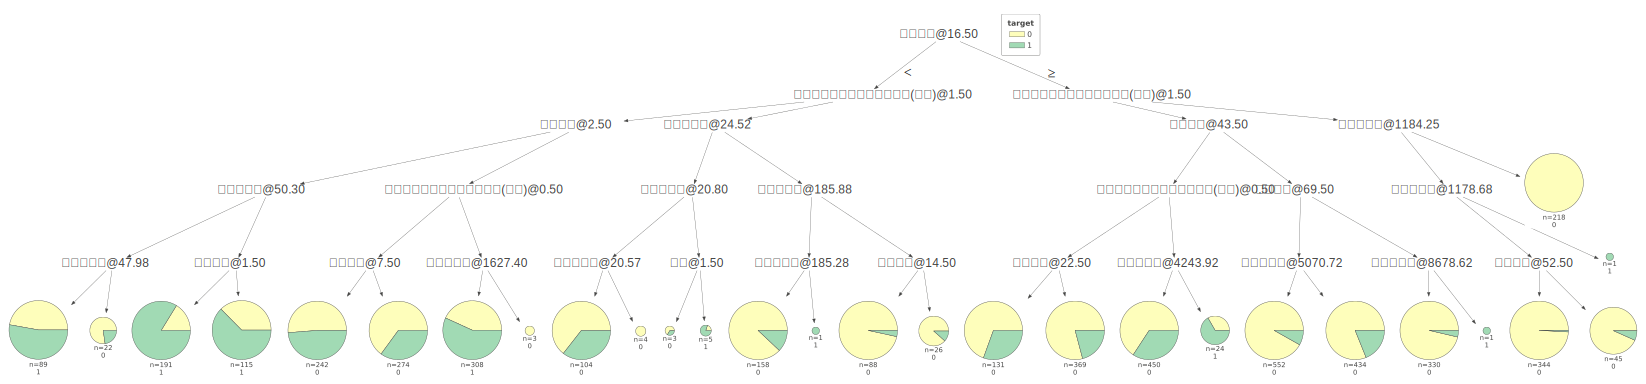

In [60]:
make_model()

In [70]:
# ここはイベント当日に参加者にベタ打ちしてもらう
display_conpetition_result()

最終正解率：72.20%
